# <font color='yellow'> Computer Vision

<font color=yellow> **The objective of this project is twofold: to delve into the study of computer vision while advancing further in the exploration of Jupyter Notebook and Python.**

Several practices will be employed in this study:

1- Below certain commands, there will be a summary of their meanings.

2- All text will be written in English.

3- The data has been extracted from exercises on the Alura platform.

# About

This project test the capabilities of Python libraries such as OpenCV and dlib to identify faces in real-time using a camera feed. In this project, we aim to demonstrate the effectiveness of modern computer vision techniques in detecting and recognizing human faces accurately and efficiently.

The project revolves around utilizing OpenCV and dlib libraries to develop a system capable of detecting faces within a live camera stream. We leverage the features provided by these libraries, including face detection, facial landmark detection, and face recognition algorithms, to achieve robust and reliable face identification.

The utilization of Python libraries like OpenCV and dlib offers numerous benefits and opens up various applications. These include enhanced security systems, automated attendance tracking, personalized user experiences, and advanced human-computer interaction in gaming and virtual reality applications. Through this project, we aim to showcase the versatility and practical applications of computer vision technologies in modern-day scenarios.

In [1]:
# Imports

import cv2
import dlib
import matplotlib.pyplot as plt
import seaborn
from os import listdir, path, makedirs
from os.path import isfile, join
import shutil
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.spatial import distance as dist
from io import BytesIO
from IPython.display import clear_output, Image, display
from PIL import Image as Img

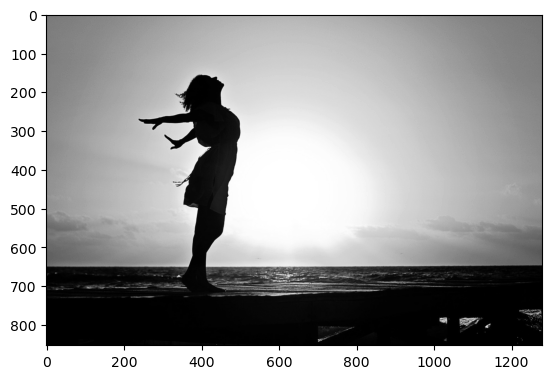

In [2]:
# Testing opencv

image_test = cv2.imread('Dados/CV-Face/px-girl.jpg')
image_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)
plt.imshow(image_test, cmap='gray')

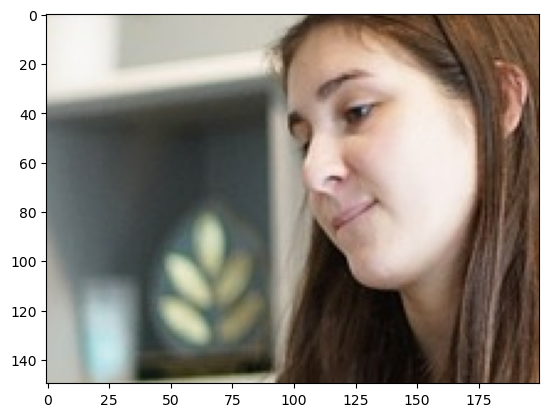

In [3]:
# Checking ROI

image_people = cv2.imread('Dados/CV-Face/px-people.jpg')
image_people = cv2.cvtColor(image_people, cv2.COLOR_BGR2RGB)

# Gathering ROI position

image_roi = image_people[100:250, 1000:1200]

plt.imshow(image_roi)

Text(0.5, 1.0, 'Kid')

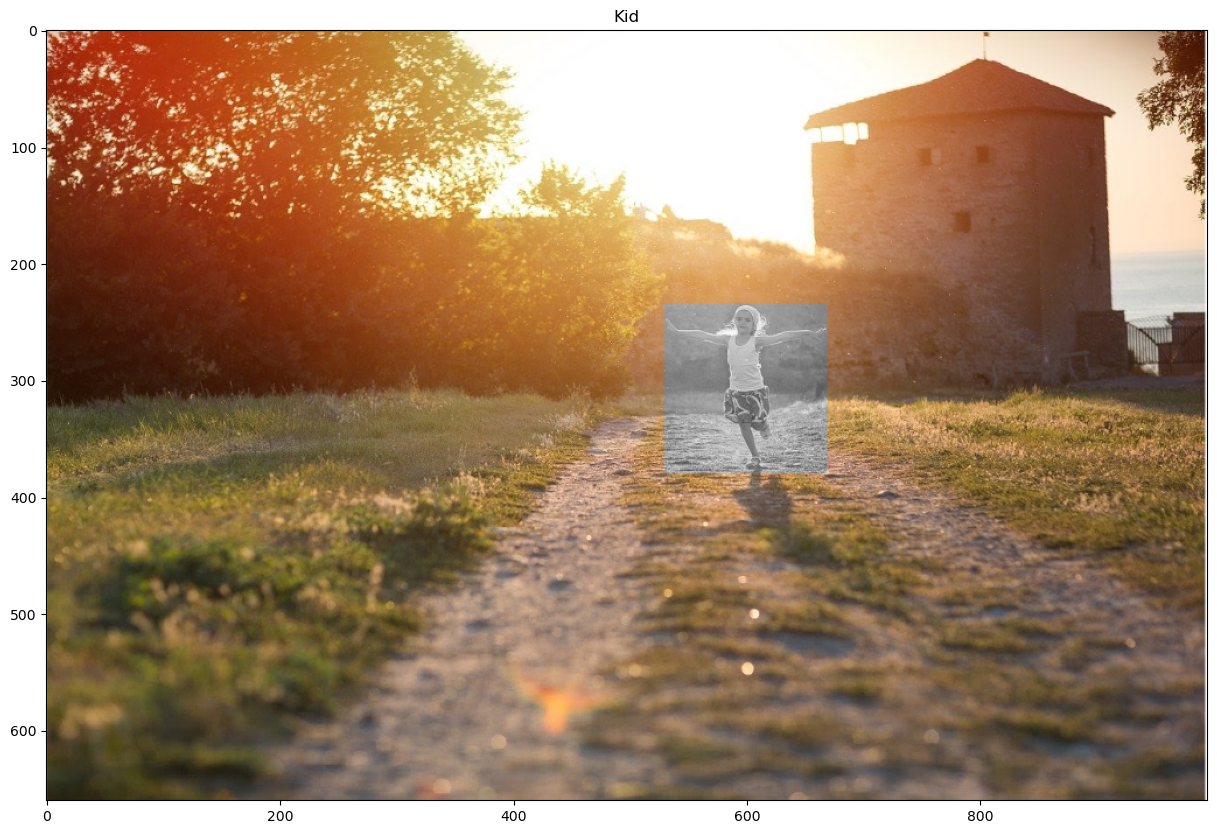

In [4]:
# Changing color on position

image_kid = cv2.imread('Dados/CV-Face/kid.jpg')
image_kid = cv2.cvtColor(image_kid, cv2.COLOR_BGR2RGB)

roi = image_kid[235:380, 530:670]
roi_gray = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
roi_rgb = cv2.cvtColor(roi_gray, cv2.COLOR_GRAY2RGB)

image_kid[235:380, 530:670] = roi_rgb

plt.figure(figsize=(20,10))
plt.imshow(image_kid)
plt.title("Kid")

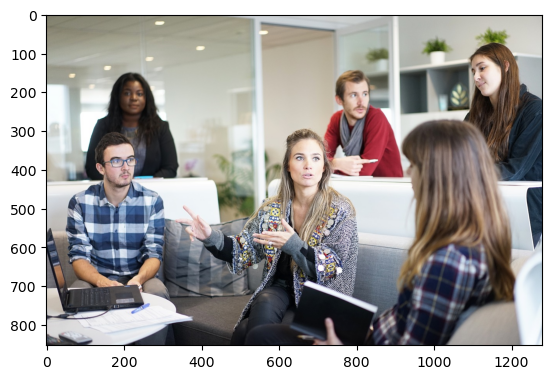

In [5]:
# Applying automate face selection using the image above:

plt.imshow(image_people)

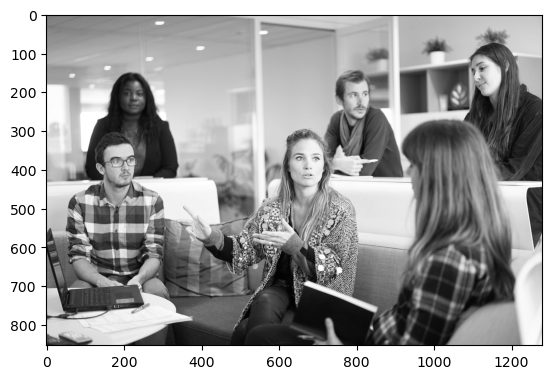

In [6]:
# Transforming this image to gray for better search

image_people_gray = cv2.cvtColor(image_people, cv2.COLOR_RGB2GRAY)

plt.imshow(image_people_gray, cmap='gray')

In [7]:
# Creating classifier for frontal faces

classifier = cv2.CascadeClassifier("Dados/classifiers/haarcascade_frontalface_default.xml")
faces = classifier.detectMultiScale(image_people_gray, 1.3, 5)
len(faces)

# the algorithm found the 5 visible faces on image

5

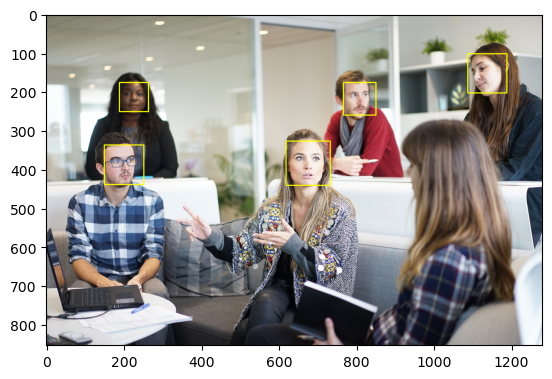

In [8]:
# Placing a rectangle on each face

image_people_rect = image_people.copy()

for (x,y,w,h) in faces:
    cv2.rectangle(image_people_rect, (x,y), (x+w,y+h), (255,255, 0), 2)

plt.imshow(image_people_rect)

In [9]:
# Store each face on a different variable

faces_image = 0
for (x,y,w,h) in faces:
    faces_image += 1
    image_people_roi  = image_people[y:y+h, x:x+w]
    image_people_roi = cv2.cvtColor(image_people_roi, cv2.COLOR_RGB2BGR)
    cv2.imwrite('Dados/Faces/face_' + str(faces_image) + '.png', image_people_roi)

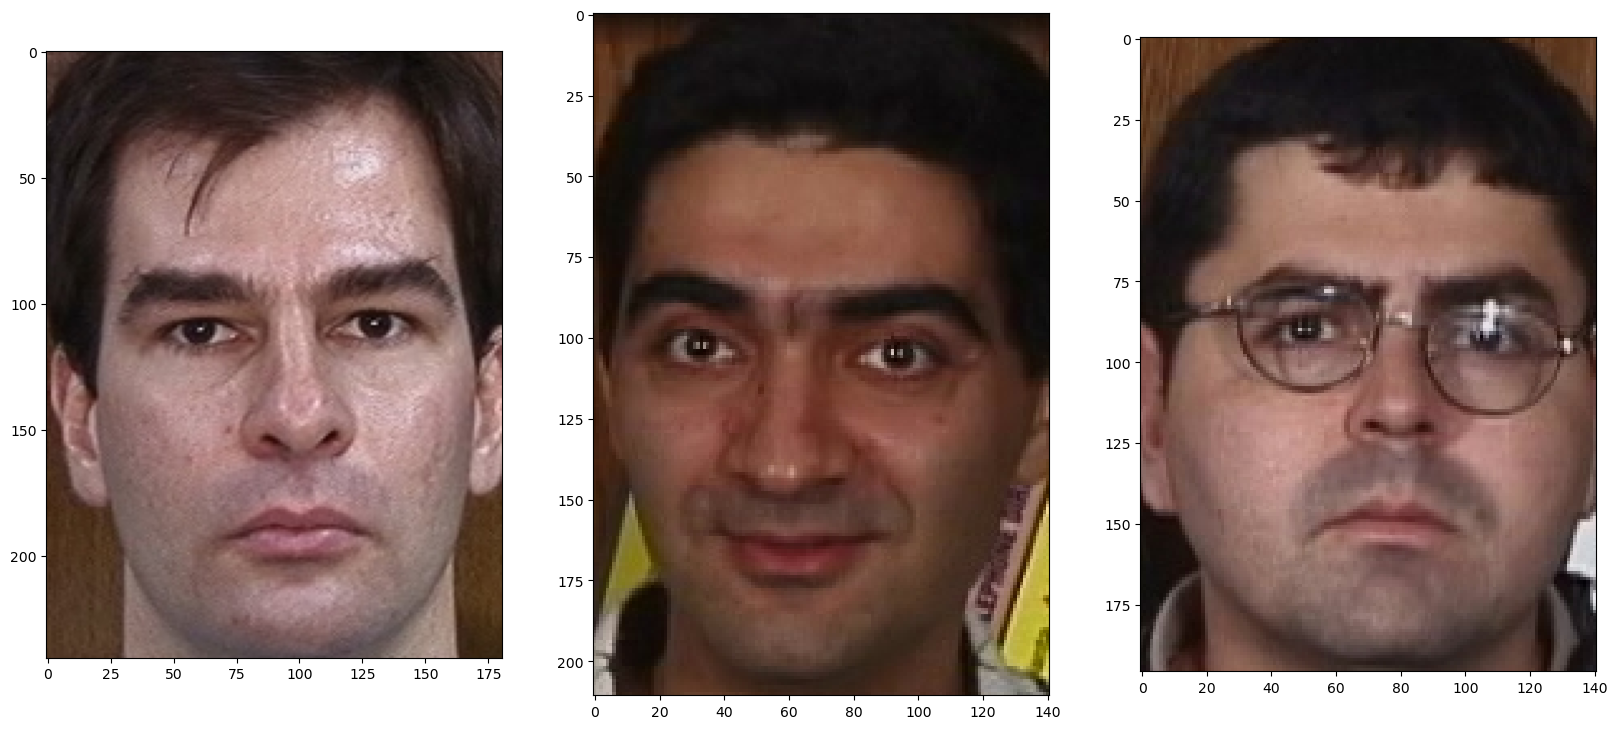

In [10]:
# Classifying faces

image_face_1 = cv2.imread("Dados/Faces-test/s01_01.jpg")
image_face_1 = cv2.cvtColor(image_face_1, cv2.COLOR_BGR2RGB)

image_face_2 = cv2.imread("Dados/Faces-test/s02_01.jpg")
image_face_2 = cv2.cvtColor(image_face_2, cv2.COLOR_BGR2RGB)

image_face_3 = cv2.imread("Dados/Faces-test/s03_01.jpg")
image_face_3 = cv2.cvtColor(image_face_3, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.imshow(image_face_1)
plt.subplot(132)
plt.imshow(image_face_2)
plt.subplot(133)
plt.imshow(image_face_3)

plt.show()

In [11]:
# Organizing path

face_path = 'Dados/Faces-test/'

list_faces = [f for f in listdir(face_path) if isfile(join(face_path, f))]
len(list_faces)

750

In [12]:
# Creating new directories

face_path_train = 'Dados/train_face/'
face_path_test = 'Dados/test_face/'

if not path.exists(face_path_train):
    makedirs(face_path_train)
if not path.exists(face_path_test):
    makedirs(face_path_test)

# Copying files to new paths separting in train and test

for file in list_faces:
    person = file[1:3]
    number = file[4:6]

    if int(number) <= 10:
        shutil.copyfile(face_path + file, face_path_train + file)
    else:
        shutil.copyfile(face_path + file, face_path_test + file)

In [13]:
# Standardizing image

def standard_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (200,200), interpolation=cv2.INTER_LANCZOS4)
    return image

In [14]:
# Creating list for train

list_face_train = [f for f in listdir(face_path_train) if isfile(join(face_path_train, f))]
list_face_test = [f for f in listdir(face_path_test) if isfile(join(face_path_test, f))]

# Creating a list for person and train data

data_train, people = [], []

for i, file in enumerate(list_face_train):
    image_path = face_path_train + file
    image = standard_image(image_path)
    data_train.append(image)
    person = file[1:3]
    people.append(int(person))

# Creating same list for person and test data

data_test, people_test = [], []

for i, file in enumerate(list_face_test):
    image_path = face_path_test + file
    image = standard_image(image_path)
    data_test.append(image)
    person = file[1:3]
    people_test.append(int(person))

print(len(data_train), len(people), len(data_test), len(people_test))

500 500 250 250


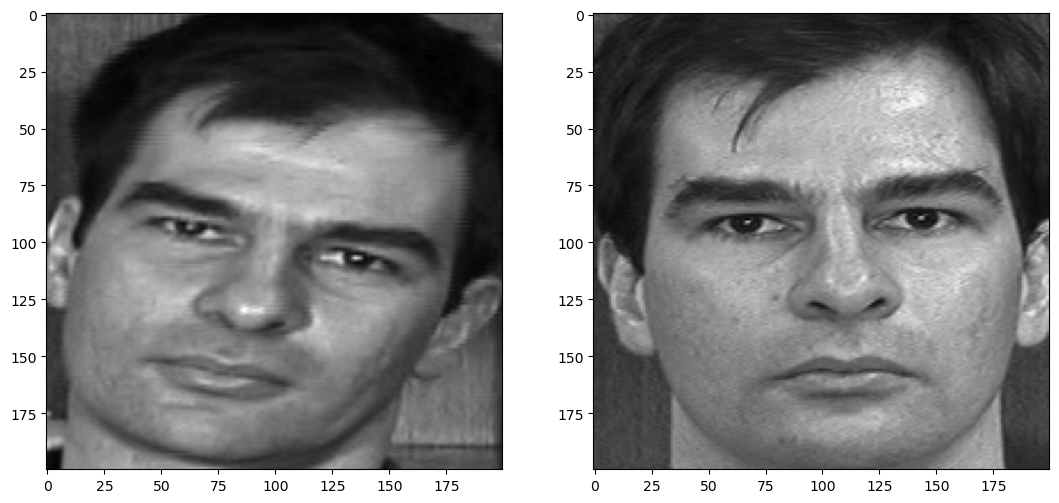

In [15]:
# Checking if the same person appears in both test and train

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.imshow(data_test[0], cmap='gray')
plt.subplot(132)
plt.imshow(data_train[0], cmap='gray')

In [16]:
# Transform both of our list to 32 bits, so we can use Eigenfaces

people = np.asarray(people, dtype = np.int32)
people_test = np.asarray(people_test, dtype = np.int32)

In [17]:
# Creating eigenfaces model

model_eigen = cv2.face.EigenFaceRecognizer_create()

# Training model

model_eigen.train(data_train, people)

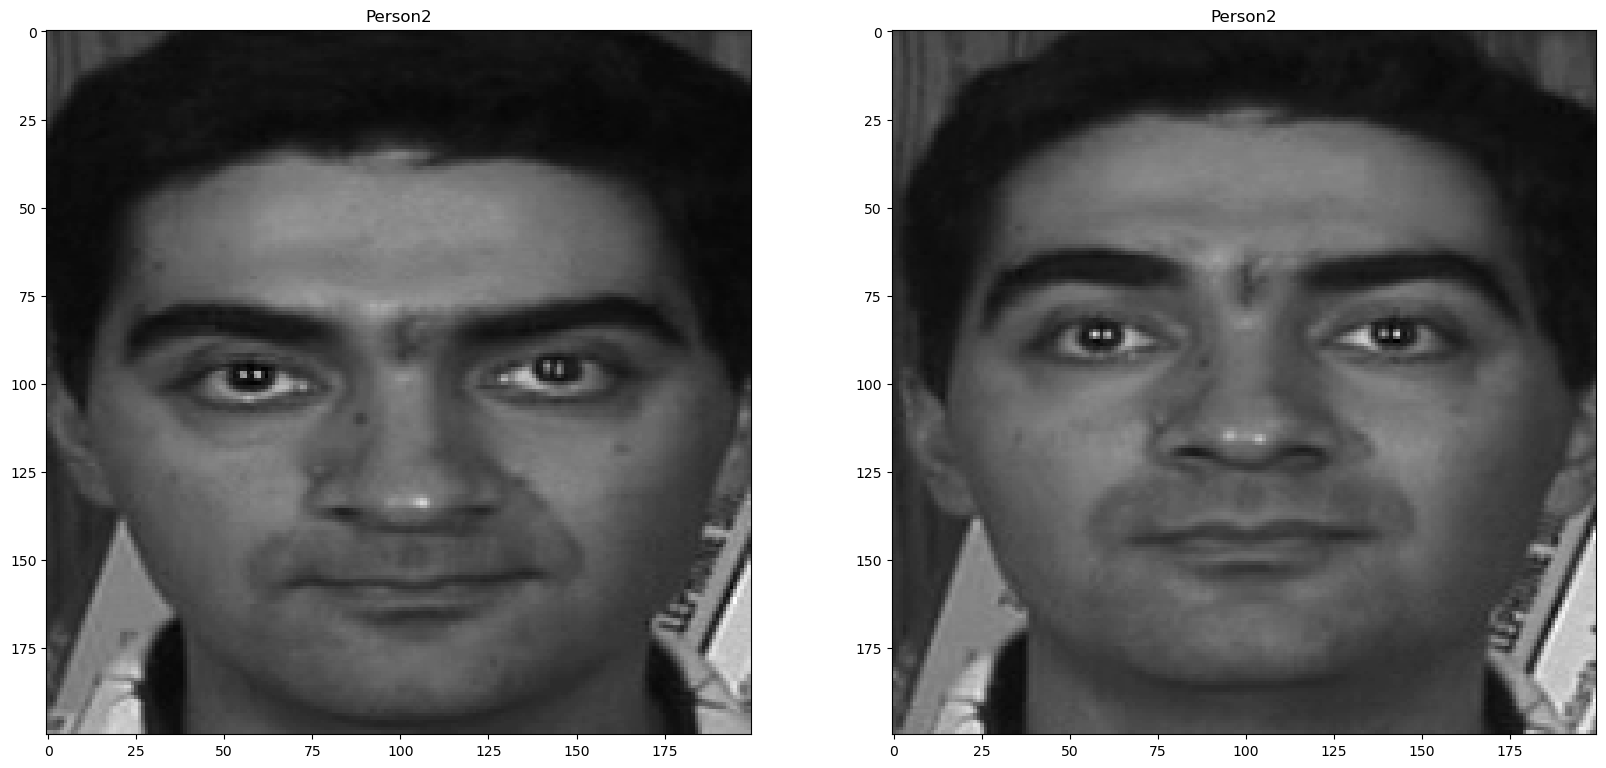

In [18]:
# Ploting images

plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('Person' + str(people_test[6]))
plt.imshow(data_test[6], cmap='gray')

plt.subplot(122)
plt.title('Person' + str(people_test[7]))
plt.imshow(data_test[7], cmap='gray')

In [19]:
# Creating prediction

prediction = model_eigen.predict(data_test[7])
prediction

# In this case the model predicted right that the 7 value on data_set is the person 2

(2, 3820.568961327711)

In [20]:
# Creating fisherfaces model

model_fisher = cv2.face.FisherFaceRecognizer_create()
model_fisher.train(data_train, people)

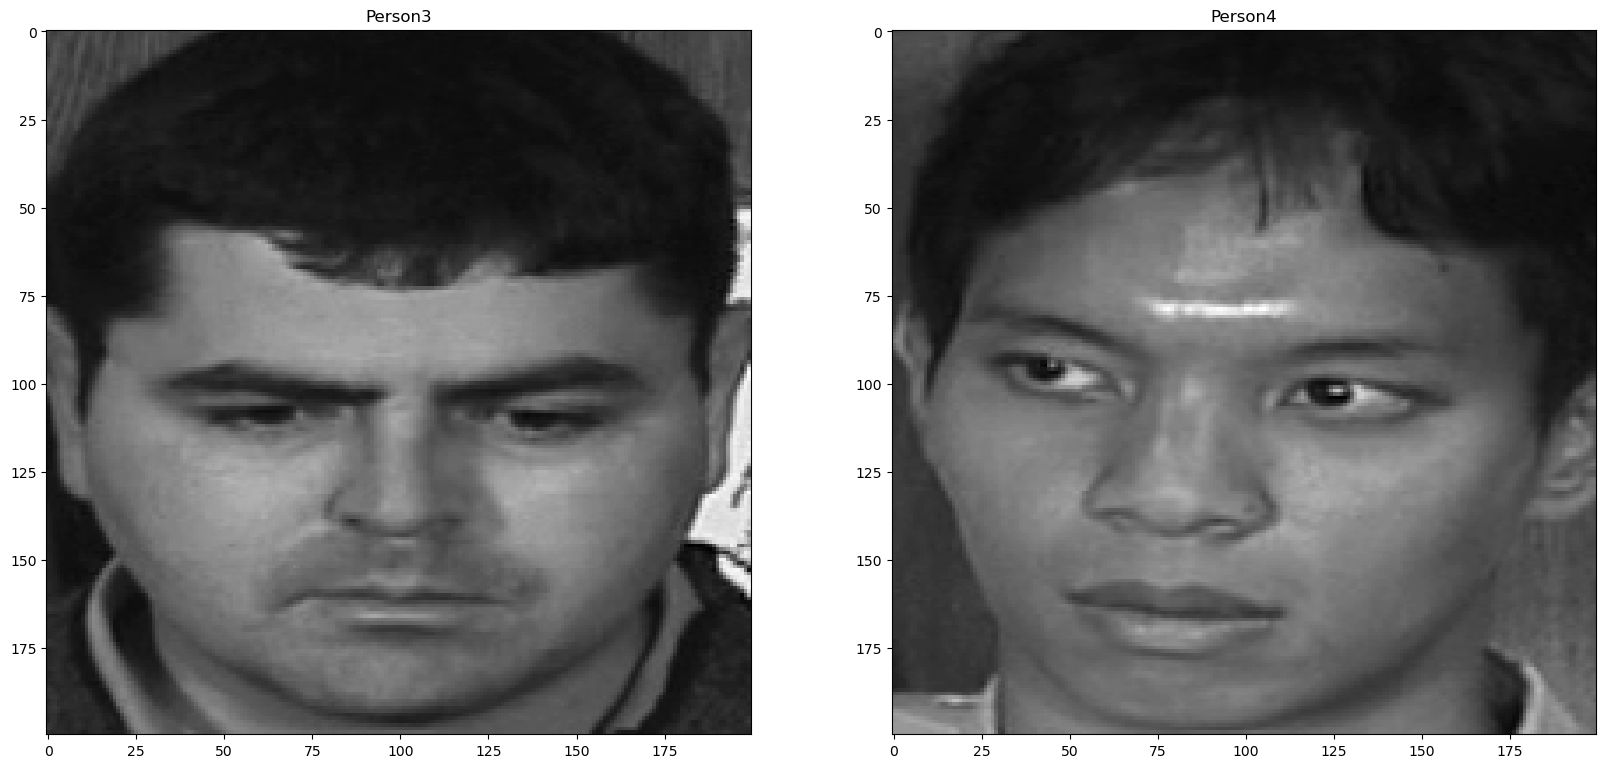

In [21]:
# Ploting images

plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('Person' + str(people_test[13]))
plt.imshow(data_test[13], cmap='gray')

plt.subplot(122)
plt.title('Person' + str(people_test[19]))
plt.imshow(data_test[19], cmap='gray')

In [22]:
# Prediction with fisherfaces

prediction = model_fisher.predict(data_test[19])
prediction

(4, 795.8141011674627)

In [23]:
# Creating lbph model

model_lbph = cv2.face.LBPHFaceRecognizer_create()
model_lbph.train(data_train, people)

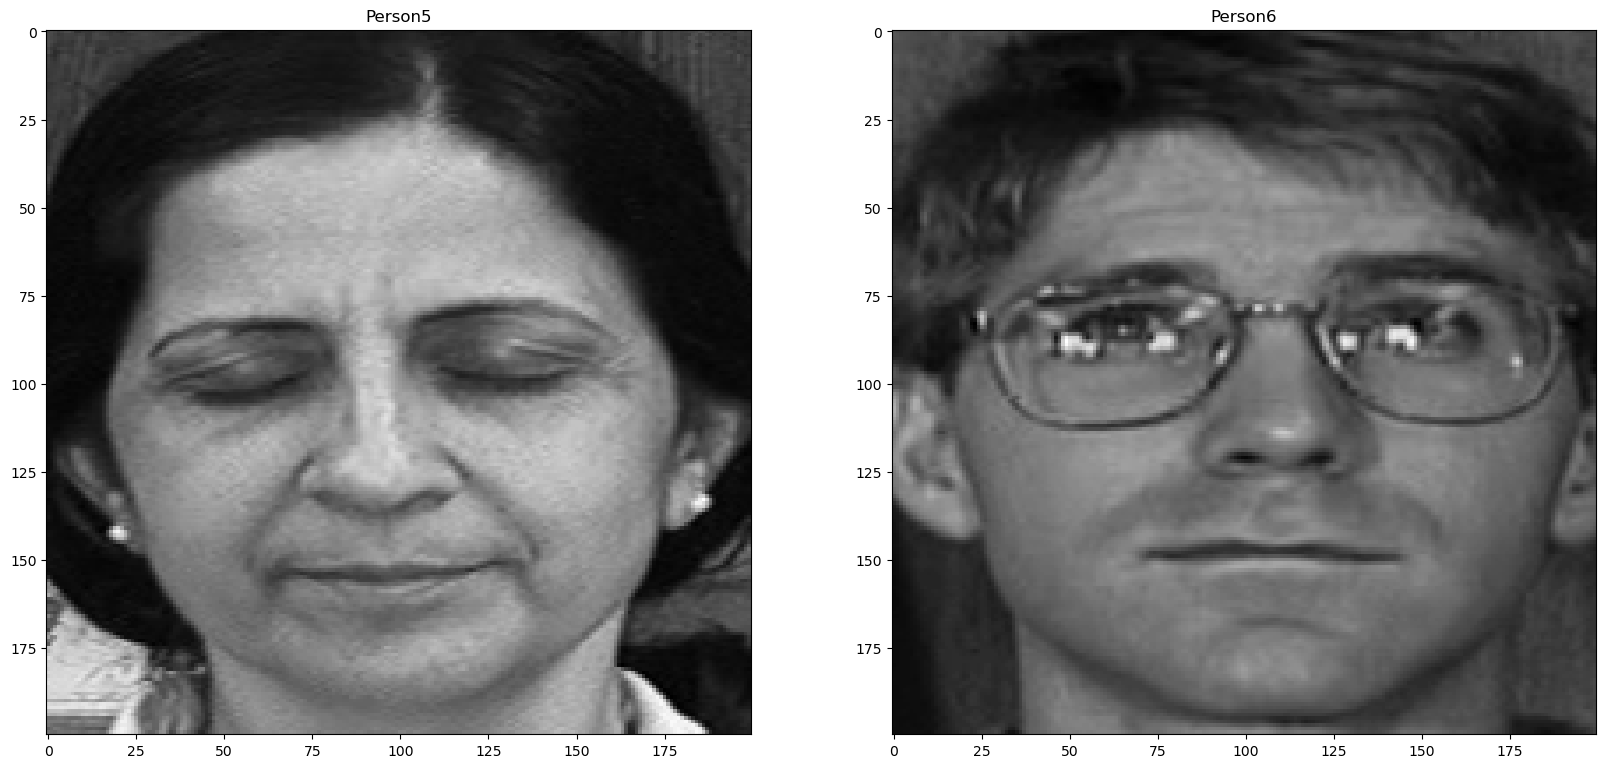

In [24]:
# Ploting images

plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('Person' + str(people_test[21]))
plt.imshow(data_test[21], cmap='gray')

plt.subplot(122)
plt.title('Person' + str(people_test[27]))
plt.imshow(data_test[27], cmap='gray')

In [25]:
# Prediction for lbph

prediction = model_lbph.predict(data_test[27])
prediction

(6, 36.49919959564635)

In [26]:
# Creating a list for it type of model to use score_accuracy after

y_pred_eingenface = []

for item in data_test:
    y_pred_eingenface.append(model_eigen.predict(item)[0])

accuracy_eigen = accuracy_score(people_test, y_pred_eingenface)

y_pred_fisher = []

for item in data_test:
    y_pred_fisher.append(model_fisher.predict(item)[0])

accuracy_fisher = accuracy_score(people_test, y_pred_fisher)

y_pred_lbph = []

for item in data_test:
    y_pred_lbph.append(model_lbph.predict(item)[0])

accuracy_lbph = accuracy_score(people_test, y_pred_lbph)


print(accuracy_eigen, accuracy_fisher, accuracy_lbph)

# Here we can check that lbph have the best score

0.724 0.52 0.792


# DLIB

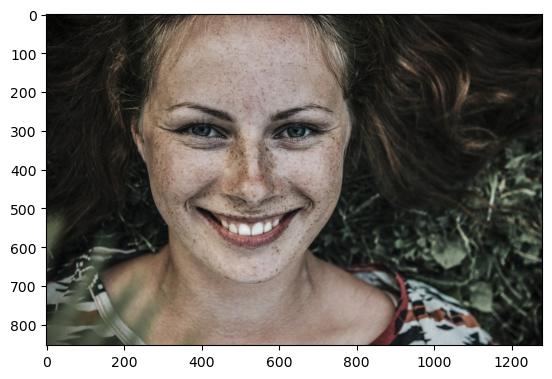

In [27]:
# Starting using DLIB, first lets check a face

image_dlib = cv2.imread('Dados/Dlib Images/px-woman-smilings.jpg')
image_dlib = cv2.cvtColor(image_dlib, cv2.COLOR_BGR2RGB)

plt.imshow(image_dlib)

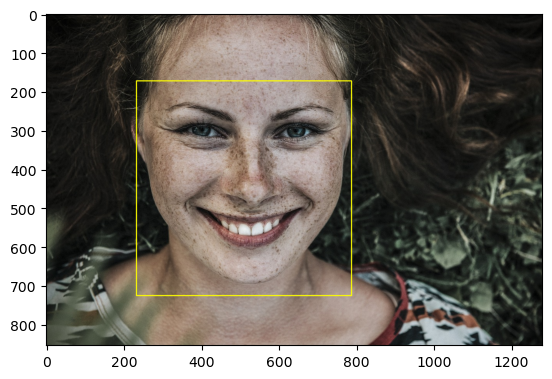

In [28]:
# Creating dlib classifier

dlib_68_classifier_path = 'Dados/classifiers/shape_predictor_68_face_landmarks.dat'
dlib_classifier = dlib.shape_predictor(dlib_68_classifier_path)
detector_face = dlib.get_frontal_face_detector()

# function to delimitate face

def delimite_face(image):
    rects = detector_face(image, 1)
    if not rects:
        return None
    for k, d in enumerate(rects):
        cv2.rectangle(image, (d.left(), d.top()), (d.right(), d.bottom()), (255, 255, 0), 2)
    return image

# Creating image copy

image_copy_68 = image_dlib.copy()
image_copy_68 = delimite_face(image_copy_68)

# Plotting

plt.imshow(image_copy_68)

In [29]:
# Creating function for facial marks

def facial_marks(image):
    rects = detector_face(image, 1)
    
    if len(rects) == 0:
        return None
    
    marks = []
    
    for rect in rects:
        marks.append(np.matrix([[p.x, p.y] for p in dlib_classifier(image, rect).parts()]))
    
    return marks

facial_mark = facial_marks(image_copy_68)

# Shows 1 face and 68 facial marks
print(len(facial_mark), len(facial_mark[0]))

1 68


In [30]:
# Function to plot all facial marks

def plot_facial_marks(image, marks):
    for mark in marks:
        for idx, point in enumerate(mark):
            center = (point[0,0], point[0,1])
            cv2.circle(image, center, 3, (255,255,0), -1)
            cv2.putText(image, str(idx), center, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

    return image

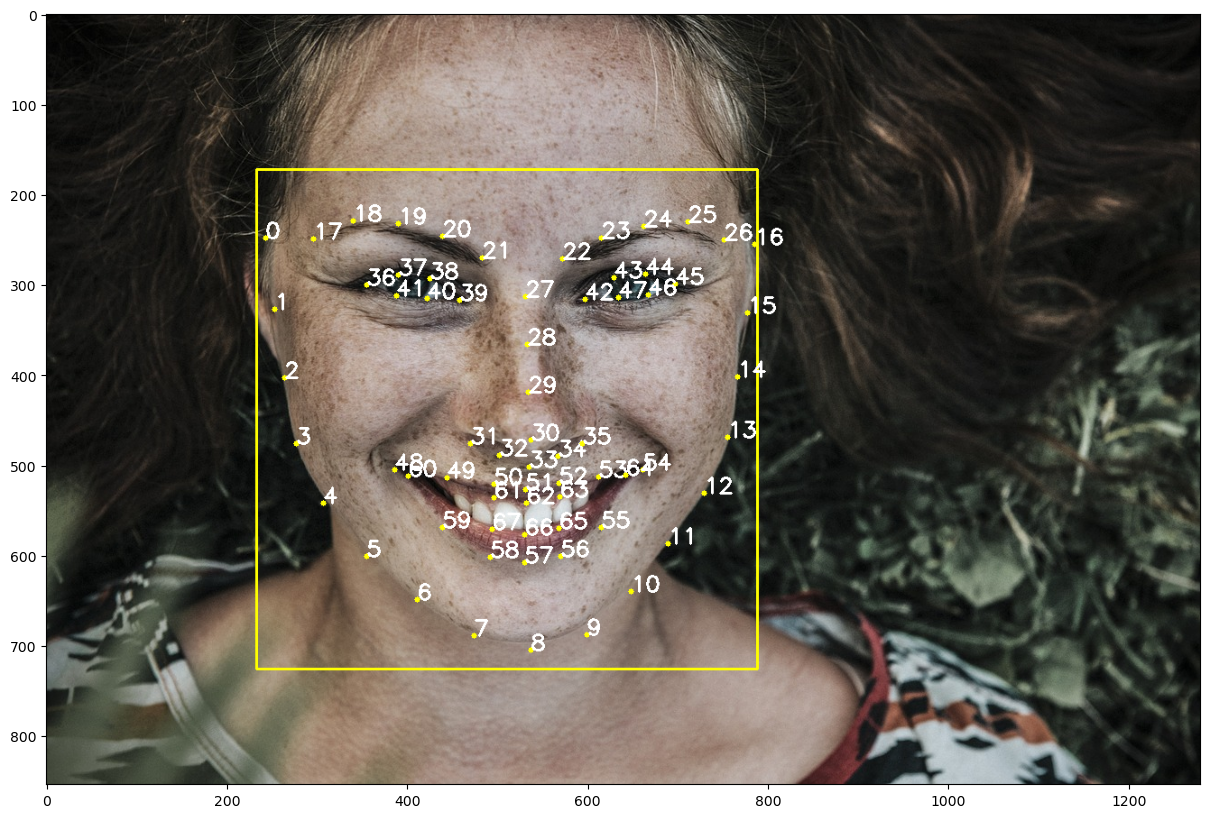

In [31]:
# Creating copy of image

image_copy_facial = image_copy_68.copy()
image_copy_facial = plot_facial_marks(image_copy_facial, facial_mark)

# Plotting image

plt.figure(figsize=(20,10))
plt.imshow(image_copy_facial)

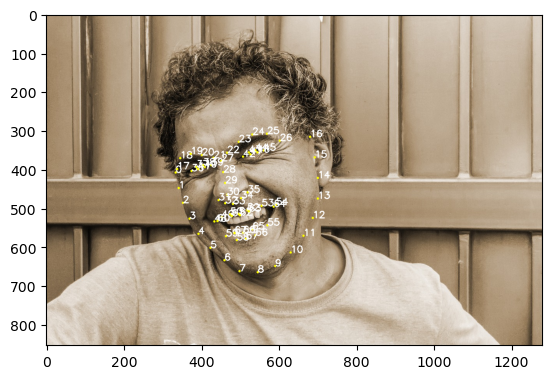

In [32]:
# Testing next image

image_man_smiling = cv2.imread('Dados/Dlib Images/px-man-happy.jpg')
image_man_smiling = cv2.cvtColor(image_man_smiling, cv2.COLOR_BGR2RGB)

image_man_smiling_copy = image_man_smiling.copy()
facial_marks_man = facial_marks(image_man_smiling)
facial_marks_man_plot =  plot_facial_marks(image_man_smiling_copy, facial_marks_man)

plt.imshow(facial_marks_man_plot)

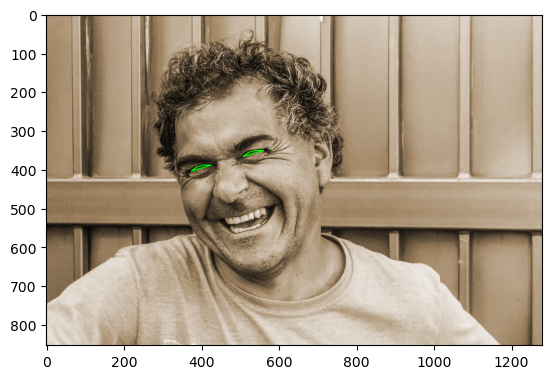

In [33]:
# Getting face points

FACE = list(range(17, 68))
FULL_FACE = list(range(0, 68))
LIP = list(range(48, 61))
RIGHT_EYEBROW = list(range(17, 22))
LEFT_EYEBROW = list(range(22, 27))
RIGHT_EYE = list(range(36, 42))
LEFT_EYE = list(range(42, 48))
NOSE = list(range(27, 35))
JAW = list(range(0, 17))

# Placing lines on eyes

def eyes_aspect(eye_points):
    
    eye_points = np.squeeze(np.asarray(eye_points)) 
    a = dist.euclidean(eye_points[1], eye_points[5])
    b = dist.euclidean(eye_points[2], eye_points[4])
    c = dist.euclidean(eye_points[0], eye_points[3])
    
    aspect_ratio = (a + b)/(2.0 * c)
    
    return aspect_ratio

def annotate_convex_hulls(image, landmarks):
    rectangles = detector_face(image, 1)
    
    if len(rectangles) == 0:
        return None
    
    for idx, rect in enumerate(rectangles):
        landmark = landmarks[idx]
        
        points = cv2.convexHull(landmark[LEFT_EYE])
        cv2.drawContours(image, [points], 0, (0,255,0), 2)
        
        points = cv2.convexHull(landmark[RIGHT_EYE])
        cv2.drawContours(image, [points], 0, (0,255,0), 2)
    
    return image

image_man_smiling_eyes = image_man_smiling.copy()
image_man_smiling_eyes = annotate_convex_hulls(image_man_smiling_eyes, facial_marks_man)

plt.imshow(image_man_smiling_eyes)

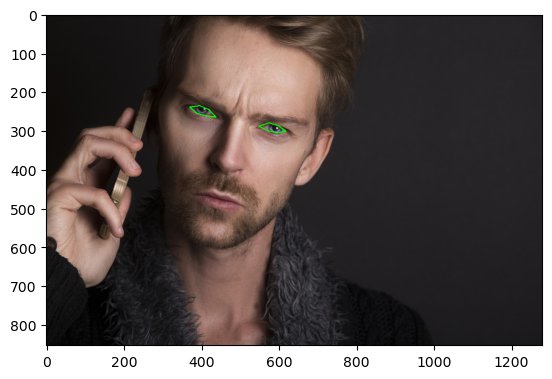

In [34]:
# Testing new image

image_serious_man = cv2.imread('Dados/Dlib Images/px-man-serious.jpg')
image_serious_man = cv2.cvtColor(image_serious_man, cv2.COLOR_BGR2RGB)

facial_marks_serious = facial_marks(image_serious_man)

image_serious_man_eyes = image_serious_man.copy()
image_serious_man_eyes = annotate_convex_hulls(image_serious_man_eyes, facial_marks_serious)

plt.imshow(image_serious_man_eyes)

In [35]:
# Creating function to standardize image

def standard_image(frame):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, (500, 400))
    
    return frame


# Creating function to show video

def show_video(frame):
    img = Img.fromarray(frame, 'RGB')
    buffer = BytesIO()
    img.save(buffer, format='JPEG')
    display(Image(data=buffer.getvalue()))
    clear_output(wait=True)

In [36]:
# Testing video

video = cv2.VideoCapture('Dados/CV-Videos/expressoes.mov')

try:
    while(True):
        capture_ok, frame = video.read()
        if capture_ok:
            frame = standard_image(frame)
            show_video(frame)

# Necessary to end kernel, but the video is working fine

except KeyboardInterrupt:
    video.release()
    print('Finished')

Finished


In [ ]:
# Create function to identify mouth

def mouth_aspect_ratio(mouth_points):
    mouth_points = np.squeeze(np.asarray(mouth_points)) 
    a = dist.euclidean(mouth_points[3], mouth_points[9])
    b = dist.euclidean(mouth_points[2], mouth_points[10])
    c = dist.euclidean(mouth_points[4], mouth_points[8])
    d = dist.euclidean(mouth_points[0], mouth_points[6])
    
    ratio_aspect = (a + b + c) / (3.0 * d)
    return ratio_aspect

def annotate_convex_hulls_mouth(image, landmarks):
    rectangles = detector_face(image, 1)
    
    if len(rectangles) == 0:
        return image
    
    for idx, rect in enumerate(rectangles):
        landmark = landmarks[idx]
        
        points = cv2.convexHull(landmark[LIP])
        cv2.drawContours(image, [points], 0, (0, 255, 0), 2)
    
    return image

In [38]:
# Testing video Mouth

try:
    ar_max = 0
    video = cv2.VideoCapture('Dados/CV-Videos/bocejo.mov')
    
    while True:
        capture_ok, frame = video.read()
        if capture_ok:
            frame = standard_image(frame)
            facial_mark_mouth = facial_marks(frame)
            
            if facial_mark_mouth is not None:
                ar_mouth = mouth_aspect_ratio(facial_mark_mouth[0][LIP])
                ar_mouth = round(ar_mouth, 3)
                
                if ar_mouth > ar_max:
                    ar_max = ar_mouth
                
                info = f"Mouth {ar_mouth} Max {ar_max}"
                
                frame = annotate_convex_hulls_mouth(frame, facial_mark_mouth)
                cv2.putText(frame, info, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)
            
            show_video(frame)

# Need to finish kernel

except KeyboardInterrupt:
    video.release()
    print("Finished")

Finished


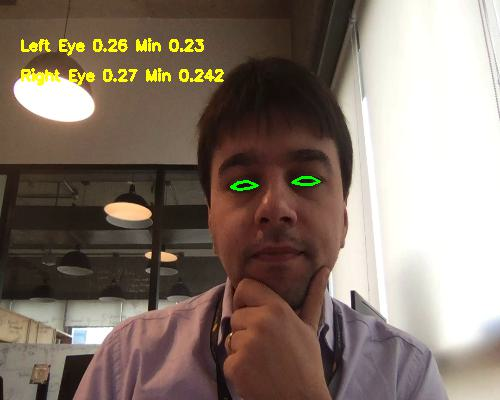

In [ ]:
# Testing video eyes

try:
    min_right_eye = 1
    min_left_eye = 1
    video = cv2.VideoCapture('Dados/CV-Videos/olhos-fechados.mov')

    while(True):
        capture_ok, frame = video.read()
        frame = standard_image(frame)
        facial_mark_eye = facial_marks(frame)

        if facial_mark_eye is not None:
            ar_left_eye = eyes_aspect(facial_mark_eye[0][LEFT_EYE])
            ar_right_eye = eyes_aspect(facial_mark_eye[0][RIGHT_EYE])
            
            ar_left_eye = round(ar_left_eye, 3)
            ar_right_eye = round(ar_right_eye, 3)

        if ar_left_eye < min_left_eye:
            min_left_eye = ar_left_eye
        if ar_right_eye < min_right_eye:
            min_right_eye = ar_right_eye

        info_le = f"Left Eye {ar_left_eye} Min {min_left_eye}"
        info_re = f"Right Eye {ar_right_eye} Min {min_right_eye}"

        frame = annotate_convex_hulls(frame, facial_mark_eye)

        cv2.putText(frame, info_le, (20,50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)
        cv2.putText(frame, info_re, (20,80), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)

        show_video(frame)

# Need to finish kernel

except KeyboardInterrupt:
    video.release()
    print("Finished")


# For limitations we need to finish kernel, if you wish to check the result you will have to run the code :(